## Імпорт потрібних бібліотек

In [1]:
import numpy as np
from matplotlib import pyplot as plt

### Завантеження данних з файлу до масивів

In [2]:
file = open("Fragment Full Data.prn", "r")
x = []
t = []
n = 0
for l in file:
    l = l.split()
    t.append(float(l[0]))
    x.append(float(l[1]))
    n += 1
file.close()
x = np.array(x)
t = np.array(t)

### Функції зображення графіків

In [3]:
def plotting(t, x, name):
    fig, ax = plt.subplots()
    plt.title(name, color = 'Orange', fontsize=15)
    ax.set_facecolor('#232323')
    ax.plot(t,x, color = 'red')
    ax.tick_params(labelcolor='tab:orange')
    plt.show()



def plotting_2(t, x, y, name):
    fig, ax = plt.subplots()
    plt.title(name, color = 'Orange', fontsize=15)
    ax.set_facecolor('#232323')
    ax.plot(t,x, color = 'red')
    ax.plot(t,y, color = 'yellow')
    ax.tick_params(labelcolor='tab:orange')
    plt.show()
    
    
def plotting_2_l(t, x, y, name, txt1, txt2):
    fig, ax = plt.subplots()
    plt.title(name, color = 'Orange', fontsize=15)
    ax.set_facecolor('#232323')
    ax.plot(t,x, color = 'red', label = txt1)
    ax.plot(t,y, color = 'yellow', label = txt2)
    ax.legend(facecolor ='#232323' , labelcolor = 'w')
    ax.tick_params(labelcolor='tab:orange')
    plt.show()

def plotting_3(t, x, y, z, name):
    fig, ax = plt.subplots()
    plt.title(name, color = 'Orange', fontsize=15)
    ax.set_facecolor('#232323')
    ax.plot(t,x, color = 'red')
    ax.plot(t,y, color = 'yellow')
    ax.plot(t,z, color = 'green')
    ax.tick_params(labelcolor='tab:orange')
    plt.show()

### Зобразимо необроблені дані

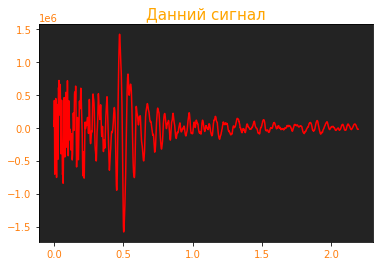

In [4]:
plotting(t, x, "Данний сигнал")

### Функція для застосування перетворення Фурьє

In [5]:
def furie(x):
    n = len(x)
    fhat =np.fft.fft(x, n)
    PSD = np.real(fhat * np.conj(fhat) )/ n
    return PSD

### Зобразимо отримані дані

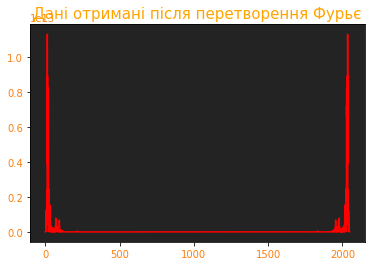

In [6]:
PSD = furie(x)
freq = (1/t[n - 1]) * np.arange(n)
L = np.arange(1, np.floor(n),  dtype = 'int')

plotting(freq[L],  PSD[L], "Дані отримані після перетворення Фурьє",)

### Змінемо маштаб

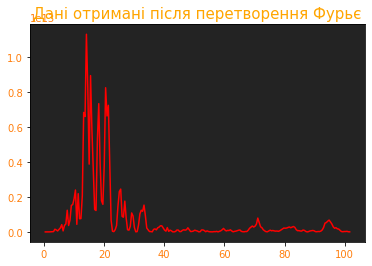

In [7]:
L = np.arange(1, np.floor(n /20),  dtype = 'int')
plotting(freq[L],  PSD[L], "Дані отримані після перетворення Фурьє",)

### Знайдемо максимальну інтенсивність і створимо сигнал з данною частотою і максимумом

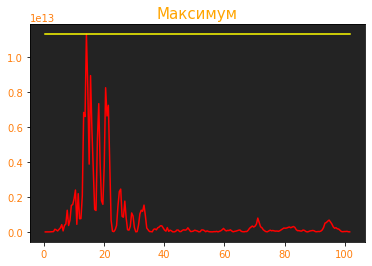

In [8]:
maximum = np.max(PSD)
index = np.argmax(PSD)
c = np.array([maximum] * n)
plotting_2(freq[L], PSD[L], c[L], "Максимум")

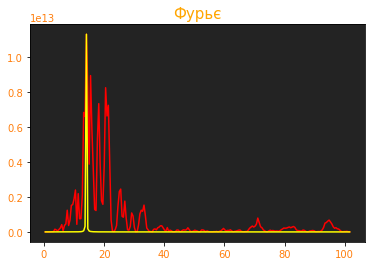

In [9]:
x_1 =  np.sin(2 * np.pi / 5 * t * 3 * index * 31 / 41)
PSD_1 = furie(x_1)
x_1 *= (maximum / np.max(PSD_1))**0.5
PSD_1 = furie(x_1)
plotting_2(freq[L], PSD[L], PSD_1[L], "Фурьє")

In [10]:
PSD = PSD - PSD_1

### Повторимо дану процедуру ще два рази

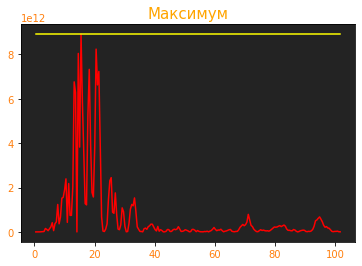

In [11]:
maximum = np.max(PSD)
index = np.argmax(PSD)
c = np.array([maximum] * n)
plotting_2(freq[L], PSD[L], c[L], "Максимум")

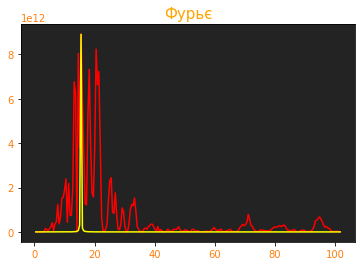

In [12]:
x_2 =  np.sin(2 * np.pi / 5 * t * 3 * index * 31 / 41)
PSD_2 = furie(x_2)
x_2 *= (maximum / np.max(PSD_2))**0.5
PSD_2 = furie(x_2)
plotting_2(freq[L], PSD[L], PSD_2[L], "Фурьє")

In [13]:
PSD = PSD - PSD_2

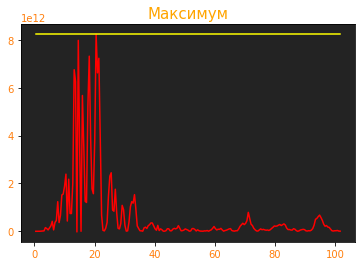

In [14]:
maximum = np.max(PSD)
index = np.argmax(PSD[0:n//2])
c = np.array([maximum] * n)
plotting_2(freq[L], PSD[L], c[L], "Максимум")

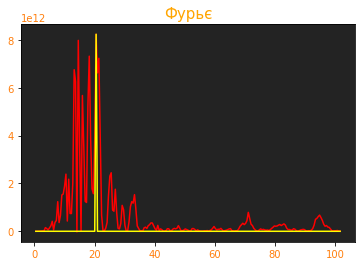

In [15]:
x_3 =  np.sin(2 * np.pi / 5 * t * 3 * index * 31 / 41 * 45 / 42 * 45 / 48)
PSD_3 = furie(x_3)
x_3 *= (maximum / np.max(PSD_3))**0.5
PSD_3 = furie(x_3)
plotting_2(freq[L], PSD[L], PSD_3[L], "Фурьє")

### Зобразимо отриманий результат

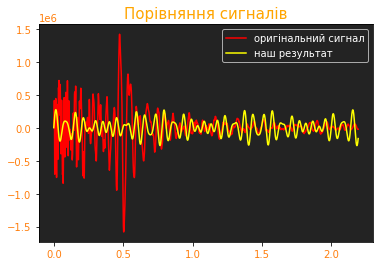

In [16]:
plotting_2_l(t, x, x_1 + x_2 + x_3, "Порівняння сигналів", "оригінальний сигнал", "наш результат")

In [17]:
PSD = furie(x)
PSD_new = furie(x_1 + x_2 + x_3)

### Порівняємо їх перетворення Фурьє

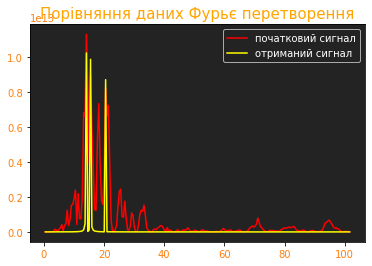

In [18]:
plotting_2_l(freq[L], PSD[L], PSD_new[L], 
             "Порівняння даних Фурьє перетворення", "початковий сигнал", "отриманий сигнал")                